# Project number 1

#### Bjørn-Jostein Singstad

## Abstract

Abstract: accurate and informative? Total number of possible points: 5*

The main aim of this project is to study in more detail various regression methods, including the Ordinary Least Squares (OLS) method, Ridge regression and finally Lasso regression. The methods are in turn combined with resampling techniques[1]  \cite{granger2013}




\begin{align}
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

$jdjjdjdj \cite{granger2013} $

<cite data-cite="hshsh"></cite>


test citation
<cite data-cite="hshsh"></cite>

## Introduction

Introduction: status of problem and the major objectives. Total number of possible points: 10

We will first study how to fit polynomials to a specific two-dimensional function called Franke's function. This is a function which has been widely used when testing various interpolation and fitting algorithms. Furthermore, after having etsablished the model and the method, we will employ resamling techniques such as the cross-validation and the bootstrap methods, in order to perform a proper assessment of our models [1].

In this case we will have two predictors and need to fit a function (for example a polynomial) of x and y. Thereafter we will repeat much of the same procedure using the the Ridge and Lasso regression methods, introducing thus a dependence on the bias (penalty) λ. [1]

## Formalism/methods

Test:
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

f(x,y)=34exp(−(9x−2)24−(9y−2)24)+34exp(−(9x+1)249−(9y+1)10)+12exp(−(9x−7)24−(9y−3)24)−15exp(−(9x−4)2−(9y−7)2)

$$ 2+3

$$ MSE(y^,y~^)=1n∑i=0n−1(yi−y~i)2)

$ R2(y^,y^~)=1−∑n−1i=0(yi−y~i)2∑n−1i=0(yi−y¯)2,

y¯=1n∑i=0n−1yi

%% $$ 64

Discussion of the methods used and their basis/suitability. Total number of possible points 20

## Code/Implementations/test

Code/Implementations/test: Readability of code, implementation, testing and discussion of benchmarks. Total number of possible points 20

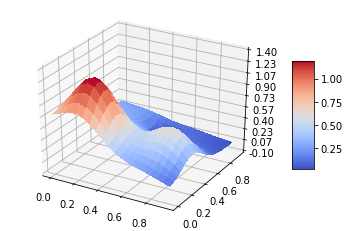

In [235]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [224]:
z.shape

(20, 20)

In [168]:
def CreateDesignMatrix_X(x, y, n = 5):

#Function for creating a design X-matrix with rows [1, x, y, x^2, xy, xy^2 , etc.]
#Input is x and y mesh or raveled mesh, keyword agruments n is the degree of the polynomial you want to fit.
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

        N = len(x)
        l = int((n+1)*(n+2)/2)
        X = np.ones((N,l))

        for i in range(1,n+1):
            q = int((i)*(i+1)/2)
            for k in range(i+1):
                X[:,q+k] = x**(i-k) * y**k
    return X

In [180]:
x_for_designmatrix=x[0].T
x_for_designmatrix


array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [182]:
y_for_designmatrix=y.T[0]
y_for_designmatrix

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [194]:
testDesMat=CreateDesignMatrix_X(x.ravel(),y.ravel)

UnboundLocalError: local variable 'X' referenced before assignment

In [191]:
np.linalg.inv(
testDesMat
)

LinAlgError: Last 2 dimensions of the array must be square

In [152]:
np.linalg.inv(designMatrix.T)

LinAlgError: Last 2 dimensions of the array must be square

In [155]:
pandas_designmatrix=pd.DataFrame(data=designMatrix)

In [109]:
(x[0]**2)*(y.T[0]**2)

array([0.0000000e+00, 6.2500000e-06, 1.0000000e-04, 5.0625000e-04,
       1.6000000e-03, 3.9062500e-03, 8.1000000e-03, 1.5006250e-02,
       2.5600000e-02, 4.1006250e-02, 6.2500000e-02, 9.1506250e-02,
       1.2960000e-01, 1.7850625e-01, 2.4010000e-01, 3.1640625e-01,
       4.0960000e-01, 5.2200625e-01, 6.5610000e-01, 8.1450625e-01])

In [110]:
x[0]**2*y.T[0]**2

array([0.0000000e+00, 6.2500000e-06, 1.0000000e-04, 5.0625000e-04,
       1.6000000e-03, 3.9062500e-03, 8.1000000e-03, 1.5006250e-02,
       2.5600000e-02, 4.1006250e-02, 6.2500000e-02, 9.1506250e-02,
       1.2960000e-01, 1.7850625e-01, 2.4010000e-01, 3.1640625e-01,
       4.0960000e-01, 5.2200625e-01, 6.5610000e-01, 8.1450625e-01])

Prøver å lage en designmatrise med [1,x,y,x^2,y^2,xy]

In [207]:
xb=np.array([np.ones(len(x)),x[0],y.T[0],x[0]**2,y.T[0]**2, x[0]*y.T[0], x[0]**3, y.T[0]**3, x[0]**2*y.T[0]**2, x[0]**4, y.T[0]**4, x[0]**3*y.T[0]**3, x[0]**5, y.T[0]**5, x[0]**4*y.T[0]**4, x[0]**6, y.T[0]**6, x[0]**5*y.T[0]**5, x[0]**7, y.T[0]**7]).T
#beta=np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(z)
#x_pred=np.linspace(0,1,100)
#y_pred=beta[0]+x_pred*beta[1]+x_pred**2*beta[2]
#return x_pred, y_pred

In [211]:
import pandas as pd
xb_dataframe=pd.DataFrame(data=xb)
xb_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.00,0.00,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.05,0.05,0.0025,0.0025,0.0025,0.000125,0.000125,0.000006,0.000006,0.000006,1.562500e-08,3.125000e-07,3.125000e-07,3.906250e-11,1.562500e-08,1.562500e-08,9.765625e-14,7.812500e-10,7.812500e-10
2,1.0,0.10,0.10,0.0100,0.0100,0.0100,0.001000,0.001000,0.000100,0.000100,0.000100,1.000000e-06,1.000000e-05,1.000000e-05,1.000000e-08,1.000000e-06,1.000000e-06,1.000000e-10,1.000000e-07,1.000000e-07
3,1.0,0.15,0.15,0.0225,0.0225,0.0225,0.003375,0.003375,0.000506,0.000506,0.000506,1.139063e-05,7.593750e-05,7.593750e-05,2.562891e-07,1.139063e-05,1.139063e-05,5.766504e-09,1.708594e-06,1.708594e-06
4,1.0,0.20,0.20,0.0400,0.0400,0.0400,0.008000,0.008000,0.001600,0.001600,0.001600,6.400000e-05,3.200000e-04,3.200000e-04,2.560000e-06,6.400000e-05,6.400000e-05,1.024000e-07,1.280000e-05,1.280000e-05
5,1.0,0.25,0.25,0.0625,0.0625,0.0625,0.015625,0.015625,0.003906,0.003906,0.003906,2.441406e-04,9.765625e-04,9.765625e-04,1.525879e-05,2.441406e-04,2.441406e-04,9.536743e-07,6.103516e-05,6.103516e-05
6,1.0,0.30,0.30,0.0900,0.0900,0.0900,0.027000,0.027000,0.008100,0.008100,0.008100,7.290000e-04,2.430000e-03,2.430000e-03,6.561000e-05,7.290000e-04,7.290000e-04,5.904900e-06,2.187000e-04,2.187000e-04
7,1.0,0.35,0.35,0.1225,0.1225,0.1225,0.042875,0.042875,0.015006,0.015006,0.015006,1.838266e-03,5.252188e-03,5.252188e-03,2.251875e-04,1.838266e-03,1.838266e-03,2.758547e-05,6.433930e-04,6.433930e-04
8,1.0,0.40,0.40,0.1600,0.1600,0.1600,0.064000,0.064000,0.025600,0.025600,0.025600,4.096000e-03,1.024000e-02,1.024000e-02,6.553600e-04,4.096000e-03,4.096000e-03,1.048576e-04,1.638400e-03,1.638400e-03
9,1.0,0.45,0.45,0.2025,0.2025,0.2025,0.091125,0.091125,0.041006,0.041006,0.041006,8.303766e-03,1.845281e-02,1.845281e-02,1.681513e-03,8.303766e-03,8.303766e-03,3.405063e-04,3.736695e-03,3.736695e-03


In [209]:
xb.shape

(20, 20)

In [210]:
np.linalg.inv(xb)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.40447839e+16, -2.14887258e+17, -2.05239181e+17,
        -1.18678283e+17, -8.25915560e+15,  2.17265858e+16,
        -8.73343048e+16, -3.36652768e+15, -2.81879411e+17,
        -9.90483753e+17,  6.44758931e+17, -9.17776579e+16,
        -1.87214639e+16, -6.86471696e+15, -5.94873240e+16,
         1.85083016e+16, -2.89675017e+16, -2.73681443e+15,
        -7.29658333e+15, -4.34155304e+15],
       [-1.40447839e+16,  2.14887258e+17,  2.05239181e+17,
         1.18678283e+17,  8.25915560e+15, -2.17265858e+16,
         8.73343048e+16,  3.36652768e+15,  2.81879411e+17,
         9.90483753e+17, -6.4

In [244]:
beta=np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(z)

beta[1]

array([467.72601495, 473.10646481, 476.09213701, 473.62106947,
       462.15601061, 437.59099901, 394.20299337, 328.93047197,
       255.85368451, 207.40258753, 200.81378436, 217.2043129 ,
       230.31288078, 232.75419881, 227.84331862, 217.06150194,
       199.55603539, 175.4019569 , 146.78080736, 117.19854988])

In [214]:
x_pred=np.arange(0, 1, 0.05)
y_pred=np.arange(0, 1, 0.05)

In [237]:

z_pred=beta[0]+x*beta[1]+y*beta[2]+x**2*beta[3]+y**2*beta[4]+x*y*beta[5]+x**3*beta[6]+y**3*beta[7]+x**2*y**2*beta[8]+x**4*beta[9]+y**4*beta[10]+x**3*y**3*beta[11]+x**5*beta[12]+y**5*beta[13]+x**4*y**4*beta[14]+x**6*beta[15]+y**6*beta[16]+x**5*y**5*beta[17]+x**7*beta[18]+y**7*beta[19]
#z_pred=beta[0]+x_pred*beta[1]+y_pred*beta[2]+x_pred**2*beta[3]+y_pred**2*beta[4]+x_pred*y_pred*beta[5]+x_pred**3*beta[6]+y_pred**3*beta[7]+x_pred**2*y_pred**2*beta[8]

In [240]:
z_pred

array([[ 7.77432736e+01, -8.89762812e+13, -3.55413966e+14,
        -7.90104275e+14, -1.36399982e+15, -2.01310254e+15,
        -2.60882942e+15, -2.95688456e+15, -2.99054729e+15,
        -3.06197823e+15, -3.68236828e+15, -4.84285982e+15,
        -6.08800653e+15, -7.14284408e+15, -8.00206312e+15,
        -8.64927676e+15, -8.97625100e+15, -8.87909264e+15,
        -8.34605996e+15, -7.47620280e+15],
       [ 8.84562595e+13,  1.00266070e+02, -2.66344562e+14,
        -7.01823799e+14, -1.27796691e+15, -1.93154584e+15,
        -2.53516186e+15, -2.89524954e+15, -2.94248949e+15,
        -3.02284982e+15, -3.64424312e+15, -4.80148006e+15,
        -6.04413697e+15, -7.09857724e+15, -7.95876289e+15,
        -8.60797796e+15, -8.93816177e+15, -8.84545380e+15,
        -8.31774952e+15, -7.45346410e+15],
       [ 3.53844762e+14,  2.66578779e+14,  1.17026654e+02,
        -4.38464996e+14, -1.02197380e+15, -1.68948232e+15,
        -2.31706930e+15, -2.71338625e+15, -2.80138509e+15,
        -2.90847444e+15, -3.5

In [200]:
pandas_designmatrix[[0,1,3]]

,0,1,3
0,1.0,0.00,0.0000
1,1.0,0.05,0.0025
2,1.0,0.10,0.0100
3,1.0,0.15,0.0225
4,1.0,0.20,0.0400
5,1.0,0.25,0.0625
6,1.0,0.30,0.0900
7,1.0,0.35,0.1225
8,1.0,0.40,0.1600
9,1.0,0.45,0.2025


In [146]:
InvertedesignMatrix = SVDinv(designMatrix)
InvertedesignMatrix

[[-2.08105995e-02 -1.59958819e-15  6.47303530e-02 ... -4.05515141e-02
  -8.93765231e-03  4.47409471e-02]
 [-2.14030393e-02 -1.53037230e-03  6.46345684e-02 ...  1.02382858e-01
   1.16962606e-01  1.27330316e-01]
 [-2.20405008e-02 -3.23491645e-03  6.44598736e-02 ...  1.03101336e-01
   1.17562761e-01  1.27319691e-01]
 ...
 [-9.86250059e-02  3.27017587e-02 -1.40370334e-01 ...  8.62814906e-01
  -1.42508511e-01 -1.31392287e-01]
 [-1.04331156e-01  1.74697476e-02 -1.61024118e-01 ... -1.42861512e-01
   8.19100699e-01 -2.20275426e-01]
 [-1.10606434e-01  5.22755764e-15 -1.83944948e-01 ... -1.32810971e-01
  -2.21884008e-01  6.49490976e-01]]
[2.99724562e+01 1.14988061e+01 1.04177069e+01 3.73234697e+00
 2.78089462e+00 2.58061715e+00 9.53246814e-01 6.66298430e-01
 5.09246702e-01 4.88348070e-01 1.90895943e-01 1.19774605e-01
 8.80573813e-02 7.00873799e-02 6.82961376e-02 2.65644080e-02
 1.44587859e-02 9.89877957e-03 7.80140425e-03 6.29367036e-03
 6.20864643e-03]
[[-6.23744783e-01 -3.42681517e-01 -3.42681

LinAlgError: Last 2 dimensions of the array must be square

In [33]:
# Husk å referer til Morten H. Jensen for bruk av denne koden!!!!!!!!

import numpy as np
# SVD inversion
def SVDinv(A):
    ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, s, VT = np.linalg.svd(A)
#    print('test U')
#    print( (np.transpose(U) @ U - U @np.transpose(U)))
#    print('test VT')
#    print( (np.transpose(VT) @ VT - VT @np.transpose(VT)))
    print(U)
    print(s)
    print(VT)

    D = np.zeros((len(U),len(VT)))
    for i in range(0,len(VT)):
        D[i,i]=s[i]
    UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.inv(D)
    return np.matmul(V,np.matmul(invD,UT))

In [117]:


X = xb
print(X)
A = np.transpose(X) @ X
#print(A)
# Brute force inversion of super-collinear matrix
#B = np.linalg.inv(A)
#print(B)
C = SVDinv(A)
#print(C)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.00000000e-02 5.00000000e-02 2.50000000e-03
  2.50000000e-03 2.50000000e-03 1.25000000e-04 1.25000000e-04
  6.25000000e-06 6.25000000e-06 6.25000000e-06 1.56250000e-08
  3.12500000e-07 3.12500000e-07 3.90625000e-11]
 [1.00000000e+00 1.00000000e-01 1.00000000e-01 1.00000000e-02
  1.00000000e-02 1.00000000e-02 1.00000000e-03 1.00000000e-03
  1.00000000e-04 1.00000000e-04 1.00000000e-04 1.00000000e-06
  1.00000000e-05 1.00000000e-05 1.00000000e-08]
 [1.00000000e+00 1.50000000e-01 1.50000000e-01 2.25000000e-02
  2.25000000e-02 2.25000000e-02 3.37500000e-03 3.37500000e-03
  5.06250000e-04 5.06250000e-04 5.06250000e-04 1.13906250e-05
  7.59375000e-05 7.59375000e-05 2.56289063e-07]
 [1.00000000e+00 2.00000000e-01 2.00000000e-01 4.00000000e-02
  


$$(X^TX)^{-1}$$


In [46]:
Step1=C.T.dot(C)

In [121]:
Step1

array([[ 2.05942420e+02,  3.36140837e+17, -3.59133536e+17,
        -2.98194714e+16, -2.73780505e+32,  2.72902274e+32],
       [ 3.36140837e+17,  4.51878339e+62,  1.32817323e+62,
         8.38944208e+62,  6.96070015e+78, -6.96070015e+78],
       [-3.59133536e+17,  1.32817323e+62,  3.90380328e+61,
         2.46584788e+62,  2.04590812e+78, -2.04590812e+78],
       [-2.98194714e+16,  8.38944208e+62,  2.46584788e+62,
         1.55755947e+63,  1.29230339e+79, -1.29230339e+79],
       [-2.73780505e+32,  6.96070015e+78,  2.04590812e+78,
         1.29230339e+79,  1.07222105e+95, -1.07222105e+95],
       [ 2.72902274e+32, -6.96070015e+78, -2.04590812e+78,
        -1.29230339e+79, -1.07222105e+95,  1.07222105e+95]])

In [123]:
xb.shape

(20, 15)

$$(X^TX)^{-1}X^T$$


In [118]:
Step2=Step1.dot(xb.T)

ValueError: shapes (6,6) and (15,20) not aligned: 6 (dim 1) != 15 (dim 0)

$$(X^TX)^{-1}X^Tz$$

In [49]:
Step3=Step2.dot(z)

In [50]:
beta=Step3

In [51]:
beta.shape

(6, 20)

In [55]:
y_pred=beta[0]+x*beta[1]+y*beta[2]+x**2*beta[3]+y**2*beta[4]+x*y*beta[5]

In [56]:
y_pred.shape

(20, 20)

In [57]:
len(x)

20

In [65]:
y_pred

array([[-2.03645366e+30,  4.09205560e+61,  1.14840061e+62,
         2.20213929e+62,  3.47057992e+62,  4.76812866e+62,
         5.85534533e+62,  6.50906587e+62,  6.70933918e+62,
         6.85713835e+62,  7.55408709e+62,  9.03049812e+62,
         1.10919535e+63,  1.34912856e+63,  1.59616567e+63,
         1.80564986e+63,  1.92286897e+63,  1.90895412e+63,
         1.76116493e+63,  1.51454805e+63],
       [-3.35610254e+75, -8.56853610e+76, -1.73743388e+77,
        -2.64174834e+77, -3.49248372e+77, -4.17379316e+77,
        -4.53925813e+77, -4.46683303e+77, -4.05513094e+77,
        -3.74732215e+77, -3.95408971e+77, -4.59999739e+77,
        -5.35018895e+77, -6.03077002e+77, -6.59434618e+77,
        -6.94586557e+77, -6.95366283e+77, -6.54814614e+77,
        -5.77643985e+77, -4.78516424e+77],
       [-1.34244101e+76, -1.73471296e+77, -3.44626221e+77,
        -5.21112380e+77, -6.88348027e+77, -8.23330999e+77,
        -8.95593158e+77, -8.78940861e+77, -7.93696580e+77,
        -7.32332083e+77, -7.7

In [101]:
from sklearn.preprocessing import normalize
y_pred_normalized = normalize(y_pred, norm='l1')
y_pred_normalized

array([[-1.10562251e-34,  2.22164093e-03,  6.23484638e-03,
         1.19557583e-02,  1.88423207e-02,  2.58869156e-02,
         3.17895847e-02,  3.53387357e-02,  3.64260508e-02,
         3.72284756e-02,  4.10123192e-02,  4.90279854e-02,
         6.02199489e-02,  7.32462978e-02,  8.66583285e-02,
         9.80315521e-02,  1.04395561e-01,  1.03640102e-01,
         9.56163961e-02,  8.22271804e-02],
       [-3.84507764e-04, -9.81694875e-03, -1.99057332e-02,
        -3.02664397e-02, -4.00132920e-02, -4.78190359e-02,
        -5.20061582e-02, -5.11763858e-02, -4.64595260e-02,
        -4.29329690e-02, -4.53018993e-02, -5.27020463e-02,
        -6.12969708e-02, -6.90943698e-02, -7.55512467e-02,
        -7.95785949e-02, -7.96679279e-02, -7.50219341e-02,
        -6.61805160e-02, -5.48234979e-02],
       [-7.75448248e-04, -1.00204039e-02, -1.99070049e-02,
        -3.01015596e-02, -3.97617672e-02, -4.75589299e-02,
        -5.17330846e-02, -5.07711805e-02, -4.58471259e-02,
        -4.23024643e-02, -4.4

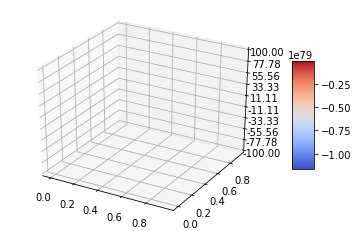

In [98]:
fig = plt.figure()
ax = fig.gca(projection='3d')








# Plot the surface.
surf = ax.plot_surface(x, y, y_pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-100.0, 100.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
dot(xb.T).shape

In [42]:
z.shape

(20, 20)

Forsøker her å prediktere y med hensyn på x og z

In [68]:
xb

array([[1.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [1.    , 0.05  , 0.05  , 0.0025, 0.0025, 0.0025],
       [1.    , 0.1   , 0.1   , 0.01  , 0.01  , 0.01  ],
       [1.    , 0.15  , 0.15  , 0.0225, 0.0225, 0.0225],
       [1.    , 0.2   , 0.2   , 0.04  , 0.04  , 0.04  ],
       [1.    , 0.25  , 0.25  , 0.0625, 0.0625, 0.0625],
       [1.    , 0.3   , 0.3   , 0.09  , 0.09  , 0.09  ],
       [1.    , 0.35  , 0.35  , 0.1225, 0.1225, 0.1225],
       [1.    , 0.4   , 0.4   , 0.16  , 0.16  , 0.16  ],
       [1.    , 0.45  , 0.45  , 0.2025, 0.2025, 0.2025],
       [1.    , 0.5   , 0.5   , 0.25  , 0.25  , 0.25  ],
       [1.    , 0.55  , 0.55  , 0.3025, 0.3025, 0.3025],
       [1.    , 0.6   , 0.6   , 0.36  , 0.36  , 0.36  ],
       [1.    , 0.65  , 0.65  , 0.4225, 0.4225, 0.4225],
       [1.    , 0.7   , 0.7   , 0.49  , 0.49  , 0.49  ],
       [1.    , 0.75  , 0.75  , 0.5625, 0.5625, 0.5625],
       [1.    , 0.8   , 0.8   , 0.64  , 0.64  , 0.64  ],
       [1.    , 0.85  , 0.85  ,

In [90]:
y_pred

array([[-2.03645366e+30,  4.09205560e+61,  1.14840061e+62,
         2.20213929e+62,  3.47057992e+62,  4.76812866e+62,
         5.85534533e+62,  6.50906587e+62,  6.70933918e+62,
         6.85713835e+62,  7.55408709e+62,  9.03049812e+62,
         1.10919535e+63,  1.34912856e+63,  1.59616567e+63,
         1.80564986e+63,  1.92286897e+63,  1.90895412e+63,
         1.76116493e+63,  1.51454805e+63],
       [-3.35610254e+75, -8.56853610e+76, -1.73743388e+77,
        -2.64174834e+77, -3.49248372e+77, -4.17379316e+77,
        -4.53925813e+77, -4.46683303e+77, -4.05513094e+77,
        -3.74732215e+77, -3.95408971e+77, -4.59999739e+77,
        -5.35018895e+77, -6.03077002e+77, -6.59434618e+77,
        -6.94586557e+77, -6.95366283e+77, -6.54814614e+77,
        -5.77643985e+77, -4.78516424e+77],
       [-1.34244101e+76, -1.73471296e+77, -3.44626221e+77,
        -5.21112380e+77, -6.88348027e+77, -8.23330999e+77,
        -8.95593158e+77, -8.78940861e+77, -7.93696580e+77,
        -7.32332083e+77, -7.7

In [89]:
z

array([[0.76642059, 0.80145419, 0.83432179, 0.85456747, 0.85151401,
        0.81885368, 0.75782695, 0.67704369, 0.58905751, 0.50574733,
        0.43491424, 0.37925502, 0.33729124, 0.30511222, 0.27806076,
        0.25206195, 0.22455251, 0.19490166, 0.16418864, 0.1344193 ],
       [0.78698902, 0.84713373, 0.90667286, 0.94977006, 0.96021513,
        0.92828716, 0.85551982, 0.75446687, 0.64362515, 0.54055699,
        0.45677614, 0.39611424, 0.35596888, 0.32981138, 0.30975379,
        0.28876385, 0.2623786 , 0.22957681, 0.19245794, 0.15484173],
       [0.81157938, 0.89814923, 0.98573922, 1.05284187, 1.07742024,
        1.04617531, 0.9609978 , 0.83869411, 0.70418409, 0.58123686,
        0.48550174, 0.42212503, 0.38719321, 0.37095442, 0.36136518,
        0.34746876, 0.32225917, 0.28427251, 0.23717665, 0.18749705],
       [0.82920437, 0.93814884, 1.04951031, 1.13699621, 1.1736604 ,
        1.14321101, 1.04790647, 0.90827736, 0.75489475, 0.61708606,
        0.51432318, 0.45303728, 0.42800846, 0

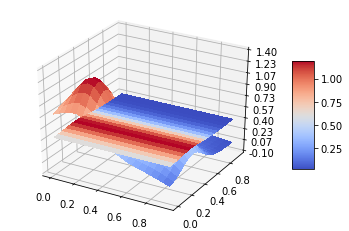

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
#from sklearn.pipeline import make_pipeline

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)



def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

#def PolynomialRegression(degree=2, **kwargs):
 #   return make_pipeline(PolynomialFeatures(degree),
  #                       LinearRegression(**kwargs))


#model = PolynomialRegression(2)
ols = LinearRegression()

model=ols.fit(x,y)

#X_test=np.linspace(0,1,100)[:, None]

z = FrankeFunction(x, y)


z_test = model.predict(z)


# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)

bla = ax.plot_surface(x, y, z_test, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


Forsøker her å prediktere y med hensyn på x og z

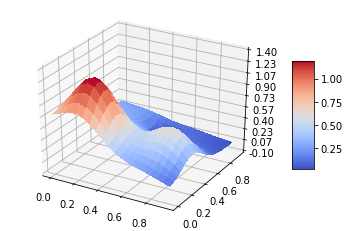

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.pipeline import make_pipeline

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)



def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))


model = PolynomialRegression(1)


model.fit(x,z)

#X_test=np.linspace(0,1,100)[:, None]

z = FrankeFunction(x, y)


z_test = model.predict(y)


# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)

bla = ax.plot_surface(x, y, y_pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Forsøker her å prediktere y med hensyn på  y og z

OLS R2-score:  -171.50203406265246
OLS Mean Square Error:  0.058056008389894075


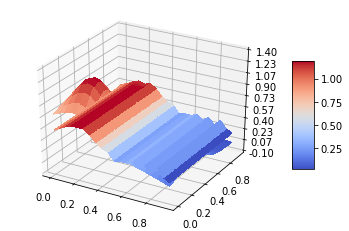

In [5]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
#from sklearn.pipeline import make_pipeline

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)



def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

z = FrankeFunction(x,y)

model = PolynomialRegression(1)


model.fit(y, z)

#X_test=np.linspace(0,1,100)[:, None]



z_test = model.predict(x)

r2 = r2_score(model.predict(x),z)
print ("OLS R2-score: ",r2 ) 
mse = mean_squared_error(model.predict(x), z)
print ("OLS Mean Square Error: ",mse)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)

bla = ax.plot_surface(x, y, z_test, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

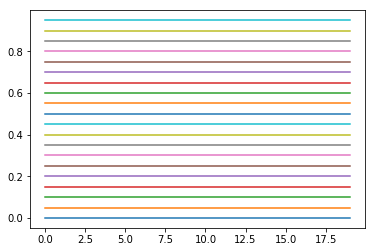

In [26]:
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)
plt.plot(x)

## From exercise 1 - tenker å gjøre om kode til å passe for dette problemet 

In [6]:
import numpy as np #Importerer Numpy biblioteket
from random import random, seed 
import matplotlib.pyplot as plt #importerer matplotlib og kaller det plt


x=np.random.rand(100,1) #random values in given shape - 100verdier mellom 0 og 1
y=5*x*x+0.1*np.random.randn(100,1) #De tilfeldige verdiene er her ganget
                            #med en funksjon. Dette tilfører støy

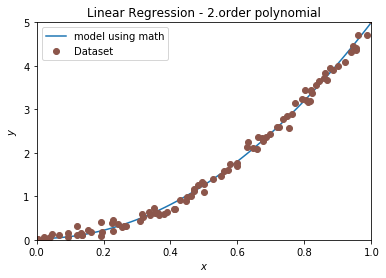

In [7]:
# #############################################################################
# Compute prediction


# Here, the Vandermonde matrix as described above is constructed. 
# The first column is simply a column of 1s, the second column is the column of x
# values from the data, and the third column is that squared.

xb = np.array([np.zeros(x.shape[0])+1, x.T[0],x.T[0]**2]).T

#We now compute the right hand side of the equation above. 
#First we multiply X and X transpose then we invert that 
#using np.linalg.inv(). Finally, we multiply that with X transpose, 
#followed by the data vector y.

beta = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)

# np.linspace(0,2,100) constructs an array of evenly-spaced values from 0 to 2
# with 100 data points total.This is just used to generate a smooth line plot. 
# If a higher resolution plot is needed we might need to increase 
# the number of points from 100.

x_r = np.linspace(0,1,100)
y_r = beta[0] + x_r*beta[1] + x_r**2*beta[2]



# #############################################################################
# Display results
plt.plot(x_r, y_r , "r-", color='C0',label='model using math') #r- lager en kontinuerlig "strek" av xnew og ypredict
plt.plot(x, y,'ro', color='C5',label='Dataset') 
plt.axis([0,1.0,0, 5.0]) #Setter aksene på plottet
plt.xlabel(r'$x$') #Setter navn på x-akse
plt.ylabel(r'$y$') #Setter navn på y-akse
plt.title(r'Linear Regression - 2.order polynomial') #Setter navn på plottet
plt.legend()
plt.show()


In [13]:
xb

array([[1.00000000e+00, 1.76552443e-01, 3.11707651e-02],
       [1.00000000e+00, 8.15526431e-01, 6.65083359e-01],
       [1.00000000e+00, 1.35106422e-01, 1.82537454e-02],
       [1.00000000e+00, 8.22642690e-01, 6.76740995e-01],
       [1.00000000e+00, 7.93601558e-01, 6.29803433e-01],
       [1.00000000e+00, 6.74767901e-01, 4.55311720e-01],
       [1.00000000e+00, 4.69301335e-01, 2.20243743e-01],
       [1.00000000e+00, 8.58521857e-01, 7.37059778e-01],
       [1.00000000e+00, 2.28614762e-01, 5.22647096e-02],
       [1.00000000e+00, 1.91196414e-01, 3.65560688e-02],
       [1.00000000e+00, 6.61479818e-01, 4.37555549e-01],
       [1.00000000e+00, 6.83784162e-01, 4.67560780e-01],
       [1.00000000e+00, 7.63420275e-01, 5.82810517e-01],
       [1.00000000e+00, 5.77651513e-01, 3.33681271e-01],
       [1.00000000e+00, 4.45283500e-01, 1.98277395e-01],
       [1.00000000e+00, 5.28192128e-01, 2.78986924e-01],
       [1.00000000e+00, 8.02683715e-01, 6.44301147e-01],
       [1.00000000e+00, 6.28771

In [6]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
terrain1 = imread('SRTM_data_Norway_1.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

FileNotFoundError: No such file: 'C:\Users\bsingstad\Documents\GitHub\FYS-STK4155-Project-1\SRTM_data_Norway_1.tif'

## Analysis/discussion

Analysis: of results and the effectiveness of their selection and presentation. Are the results well understood and discussed? Total number of possible points: 20

## Conclusions

Conclusions, discussions and critical comments: on what was learned about the method used and on the results obtained. Possible directions and future improvements? Total number of possible points: 10

## Clarity of figures and overall presentation

Clarity of figures and overall presentation. Too much or too little? Total number of possible points: 10*

## Referencing

Referencing: relevant works cited accurately? Total number of possible points 5*

[1] From the task https://compphysics.github.io/MachineLearning/doc/Projects/2018/Project1/html/Project1-bs.html

## Overall mark (%) and final possible final comments*